# dblob
Demonstrate blob measurements and display.

## Description

In this example, a binary image with many blobs is processed. The objective is to measure the area of each blob. First the blobs are labeled. To display the correspondent label number of each blob, a trick is used to dilate each labeled centroid by a structuring element formed by the number of the blob label. At final, the area of each blob is plotted against its label number.

In [1]:
import numpy as np
from PIL import Image
import ia870 as ia

## Image reading and labeling

The binary image is read and then labeled. The number of blobs is measured as the maximum label value. Both images are displayed. 

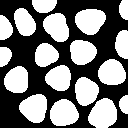

In [2]:
f_pil = Image.open('data/blob3.tif')
f_pil

In [3]:
f = np.array(f_pil) > 0
fr = ia.ialabel(f);
nblobs=ia.iastats(fr,'max')
print(nblobs)

18


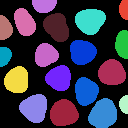

In [4]:
Image.fromarray(ia.iaglblshow(fr,'border').transpose(1, 2 ,0))

## Centroids
The centroids are computed from the labeled image. After, the centroid image is labeled, so that each centroid point has a label value varying from 1 to the maximum number of blobs. For display illustration, the centroids are overlayed on the original blob image on the left and the labeled centroids are enlarged and displayed on the right. 

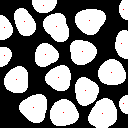

In [5]:
c = ia.iablob(fr,'centroid') # boolean image
cr = ia.ialabel(c)
Image.fromarray(ia.iagshow(f,c).transpose(1, 2 ,0))

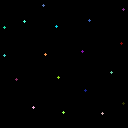

In [6]:
Image.fromarray(ia.iaglblshow(ia.iadil(cr)).transpose(1, 2, 0))

## Placing a number on a particular blob

In [7]:
fbin=ia.iacmp(cr,'==',np.uint16(5))
#print(f5)
f5 = ia.iatext('5')
b5 = ia.iaimg2se(f5)
fb5 = ia.iadil(fbin, b5)

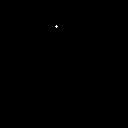

In [8]:
#Temp = ia.iadil(fbin)
#Temp = Temp.astype(np.uint8)*255
#print(type(Temp))
#Image.fromarray(ia.iagshow(Temp))
#mmshow(f,fb5);
Image.fromarray(ia.iadil(fbin).astype(np.uint8)*255)

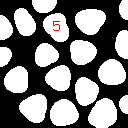

In [9]:
Image.fromarray(ia.iagshow(f.astype(np.uint8)*255, fb5).transpose(1, 2, 0))

## Placing a label number to each labeled blob
To automate the process just described, a loop scans every label value and stamp its number in a final image.
The stamps are accumulated with the mmunion function. The area is computed and plotted against each label blob number. 

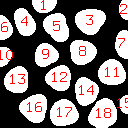

In [10]:
facc=ia.iasubm(f,f);
for i in range(1,nblobs+1):
    fbin = cr == i
    fi   = ia.iatext(str(i))
    bi   = ia.iaimg2se(fi)
    fbi  = ia.iadil(fbin,bi)
    facc = ia.iaunion(facc,fbi)
Image.fromarray(ia.iagshow(f.astype(np.uint8)*255, facc).transpose(1, 2, 0))

In [11]:
darea = ia.iablob(fr,'area','data')

<BarContainer object of 18 artists>

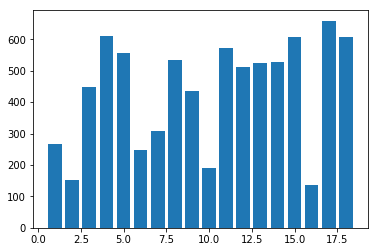

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(np.arange(nblobs)+1,darea)